In [69]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import xarray as xa
import h5py    
import pandas as pd
import os
import re

fig_path = '/home/dm/uni/ccees/seminar/analysis/figures/'
name_convention = 'E_vert_fedge-'

In [2]:
universe_paths =  !find uni*/data*

In [3]:
universe_paths

['uni01/data.h5',
 'uni02/data.h5',
 'uni03/data.h5',
 'uni04/data.h5',
 'uni05/data.h5',
 'uni06/data.h5',
 'uni07/data.h5',
 'uni08/data.h5',
 'uni09/data.h5',
 'uni10/data.h5',
 'uni11/data.h5',
 'uni12/data.h5',
 'uni13/data.h5',
 'uni14/data.h5',
 'uni15/data.h5']

In [59]:
#regex = re.compile('uni*')
#universes = list(filter(regex.search, [name for name in os.listdir(".") if os.path.isdir(name)]))

In [4]:
universe_data = []
for uni in universe_paths:
    file_name = uni
    universe_data.append(h5py.File(uni , 'r+'))

no_universe = len(universe_data)

In [5]:
universe_data

[<HDF5 file "data.h5" (mode r+)>,
 <HDF5 file "data.h5" (mode r+)>,
 <HDF5 file "data.h5" (mode r+)>,
 <HDF5 file "data.h5" (mode r+)>,
 <HDF5 file "data.h5" (mode r+)>,
 <HDF5 file "data.h5" (mode r+)>,
 <HDF5 file "data.h5" (mode r+)>,
 <HDF5 file "data.h5" (mode r+)>,
 <HDF5 file "data.h5" (mode r+)>,
 <HDF5 file "data.h5" (mode r+)>,
 <HDF5 file "data.h5" (mode r+)>,
 <HDF5 file "data.h5" (mode r+)>,
 <HDF5 file "data.h5" (mode r+)>,
 <HDF5 file "data.h5" (mode r+)>,
 <HDF5 file "data.h5" (mode r+)>]

In [7]:
ref_data_shape = universe_data[0]['MyFancySeirModel']['SEIR_reference'].shape
ref_data = np.empty((ref_data_shape[0], ref_data_shape[1], no_universe ))
for i in range(no_universe):
    ref_data[:, :, i] = universe_data[i]['MyFancySeirModel']['SEIR_reference'][()] 

In [8]:
#comps = ['D', 'E', 'I', 'N', 'R', 'S']
comps = ['D', 'E', 'I', 'R', 'S']
sim_data = []
no_uni_vertices = np.empty(no_universe)
for i in range(no_universe):
    shape = universe_data[i]['MyFancySeirModel']['g_static']['D'].shape
    no_uni_vertices[i] = shape[1]
    comp_data = np.empty((shape[0], shape[1],  len(comps)))
    for (j, comp) in enumerate(comps):
        comp_data[:, :, j] = universe_data[i]['MyFancySeirModel']['g_static'][comp]
    sim_data.append(comp_data)

###  Number of Vertices


In [9]:
print(no_uni_vertices)

[ 10.  20.  40.  60.  80. 100. 120. 140. 160. 180. 200. 250. 300. 350.
 400.]


### Summed Total Population

In [10]:
sim_Sdata = []

for uni in range(no_universe):
    sim_Sdata.append(np.sum(sim_data[uni], axis=1))

In [15]:
ref_data.shape[1]

5

In [11]:
ref_names = ['S', 'E', 'I', 'R', 'D']

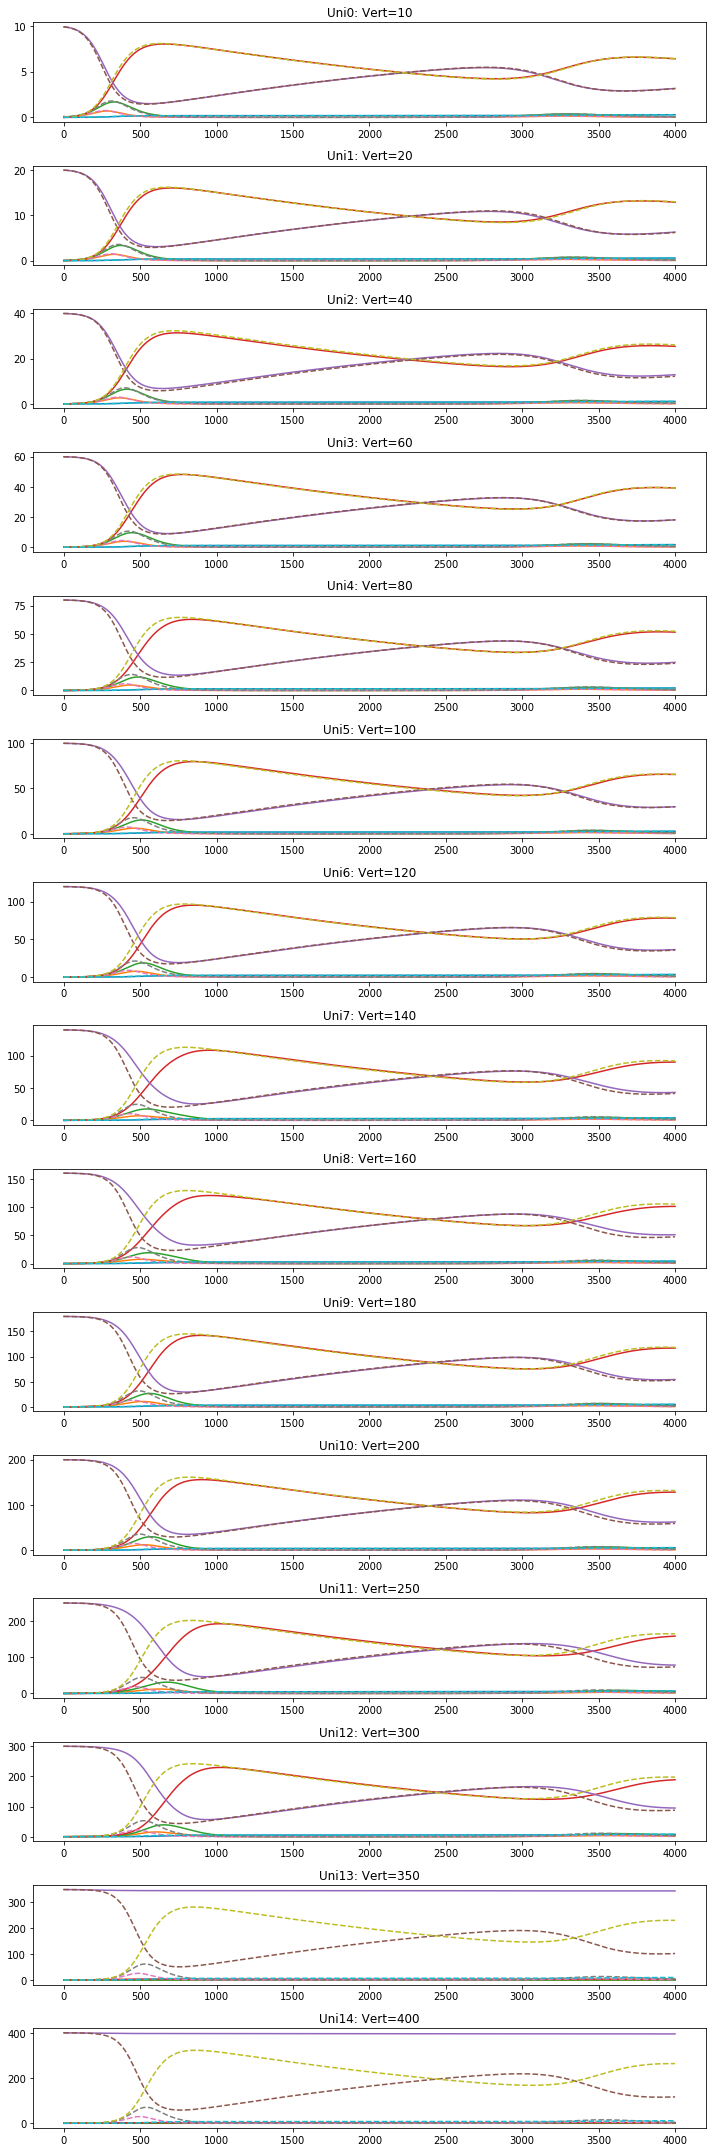

In [17]:
vertsweep_fig, ax = plt.subplots(no_universe, 1, figsize=(10,30))
ax = ax.flatten()

for uni in range(no_universe):
    for comp in range(len(comps)):
        ax[uni].plot(sim_Sdata[uni][:, comp], label=comps[comp])
    
    for i in range(ref_data.shape[1]):
        ax[uni].plot(ref_data[:, i, uni], '--', label='{}'.format(ref_names[i]))
    
    ax[uni].set_title('Uni{}: Vert={}'.format(uni,sim_data[uni][:, :, 0].shape[1]))
    #ax[uni].legend()
        
plt.tight_layout()

### Dependency of Infection Waves on Vertices in Network

#### Calculate the position and value of the infection waves

In [65]:
idx_secwave = 2000

time_max_infected = np.empty(no_universe, dtype=np.int32)
time_secmax_infected = np.empty(no_universe, dtype=np.int32)
value_max_infected = np.empty(no_universe)
value_secmax_infected = np.empty(no_universe)
time_ref_max = np.empty(no_universe)
time_ref_secmax = np.empty(no_universe)
value_ref_max = np.empty(no_universe)
value_ref_secmax = np.empty(no_universe)
for uni in range(no_universe):
    time_max_infected[uni] = (np.argmax(sim_Sdata[uni][:, 2]))
    value_max_infected[uni] = sim_Sdata[uni][(time_max_infected[uni]), 2]
    time_secmax_infected[uni] = idx_secwave + (np.argmax(sim_Sdata[uni][idx_secwave:, 2]))
    value_secmax_infected[uni] = sim_Sdata[uni][(time_secmax_infected[uni]), 2]
    time_ref_max[uni] = (np.argmax(ref_data[:, 2, uni]))
    time_ref_secmax[uni] = idx_secwave + (np.argmax(ref_data[idx_secwave:, 2, uni]))
    value_ref_max[uni] = ref_data[int(time_ref_max[uni]), 2, uni]
    value_ref_secmax[uni] = ref_data[int(time_ref_secmax[uni]), 2, uni]

print(time_max_infected)
print(time_secmax_infected)
print(time_ref_max)
print(time_ref_secmax)

[329 374 413 448 485 510 520 543 559 563 571 676 655 287 254]
[3293 3320 3388 3419 3439 3467 3480 3507 3525 3521 3529 3631 3632 2662
 2333]
[314. 357. 400. 425. 443. 456. 467. 477. 485. 492. 499. 512. 523. 533.
 541.]
[3303. 3343. 3384. 3408. 3425. 3439. 3450. 3459. 3467. 3474. 3481. 3494.
 3505. 3515. 3523.]


#### Visualize Infection Waves for all vertices

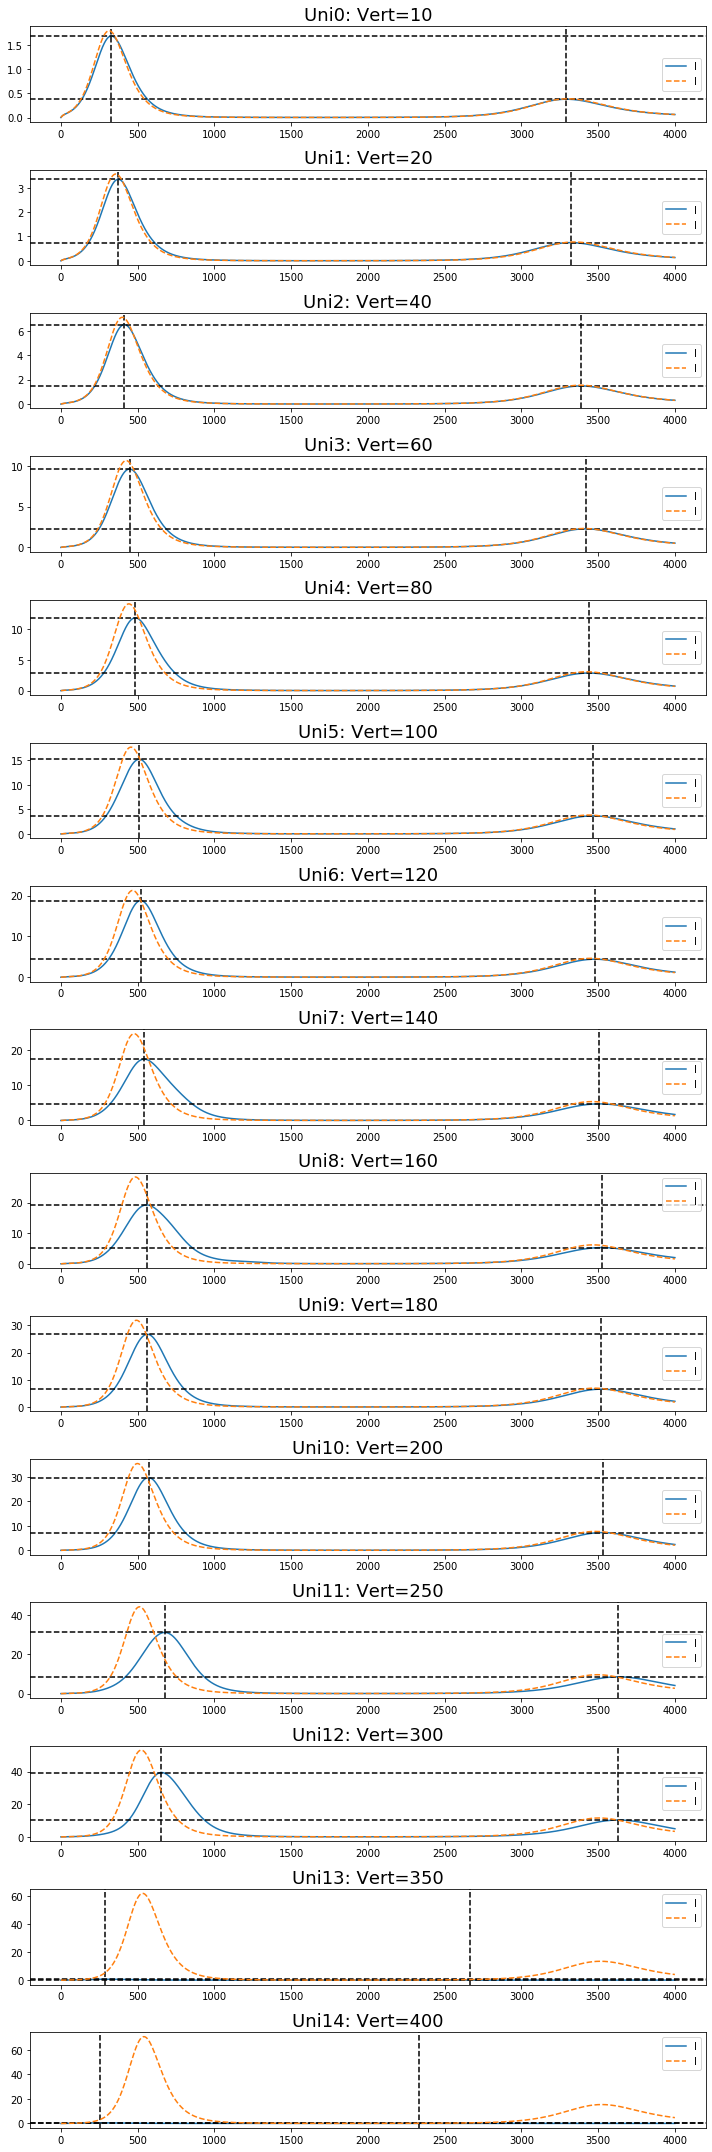

In [71]:
vertsweep_fig, ax = plt.subplots(no_universe, 1, figsize=(10,30))
ax = ax.flatten()

for uni in range(no_universe):
    comp=2
    ax[uni].plot(sim_Sdata[uni][:, comp], label=comps[comp])
    ax[uni].axhline(value_max_infected[uni], ls='--',ms=1, color='black' )
    ax[uni].axvline(time_max_infected[uni], ls='--',ms=1, color='black' )
    
    ax[uni].axhline(value_secmax_infected[uni], ls='--',ms=1, color='black' )
    ax[uni].axvline(time_secmax_infected[uni], ls='--',ms=1, color='black' )
    ax[uni].plot(ref_data[:, 2, uni], '--', label='{}'.format(ref_names[2]))
    
    ax[uni].set_title('Uni{}: Vert={}'.format(uni,sim_data[uni][:, :, 0].shape[1]))
    ax[uni].legend()
        
plt.tight_layout()

#### Compare Infection Wave Positions and Severity

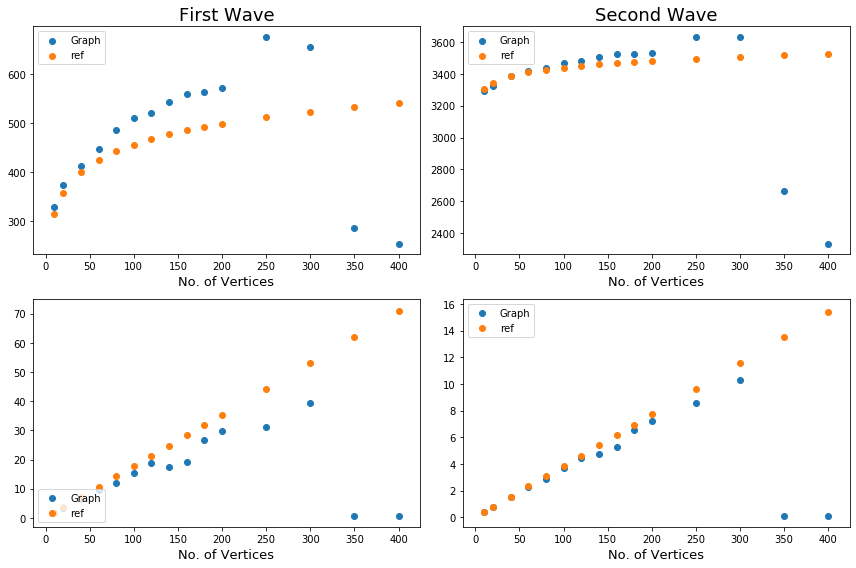

In [66]:
plt.rc('axes', titlesize=18)
plt.rc('axes', titlesize=18)
maxI_fig, ax = plt.subplots(2, 2, figsize=(12,8))
ax = ax.flatten()
ax[0].scatter(no_uni_vertices, time_max_infected, label='Graph')
ax[0].scatter(no_uni_vertices, time_ref_max, label='ref')
ax[2].scatter(no_uni_vertices, value_max_infected, label='Graph')
ax[2].scatter(no_uni_vertices, value_ref_max, label='ref') 
ax[1].scatter(no_uni_vertices, time_secmax_infected, label='Graph')
ax[1].scatter(no_uni_vertices, time_ref_secmax, label='ref')
ax[3].scatter(no_uni_vertices, value_secmax_infected, label='Graph')
ax[3].scatter(no_uni_vertices, value_ref_secmax, label='ref') 
ax[0].legend(loc='upper left')
ax[1].legend()
ax[2].legend(loc='lower left')
ax[3].legend()

ax[0].set_title("First Wave")
ax[1].set_title("Second Wave")

for i in range(4):
    ax[i].set_xlabel('No. of Vertices')

plt.tight_layout()

Show the percentage difference to the SEIR reference model:

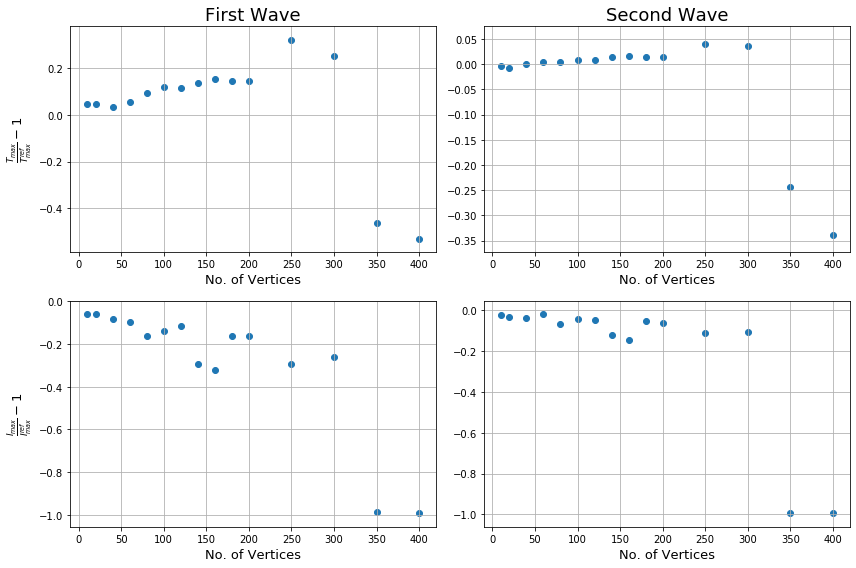

In [70]:
plt.rc('axes', labelsize=13)
plt.rc('axes', titlesize=18)
maxIratioref_fig, ax = plt.subplots(2, 2, figsize=(12,8))
ax = ax.flatten()
ax[0].scatter(no_uni_vertices, (time_max_infected/ time_ref_max - 1))
ax[2].scatter(no_uni_vertices, (value_max_infected/ value_ref_max - 1))
ax[1].scatter(no_uni_vertices, (time_secmax_infected/ time_ref_secmax - 1))
ax[3].scatter(no_uni_vertices, (value_secmax_infected / value_ref_secmax -1 ))

ax[0].set_title("First Wave")
ax[1].set_title("Second Wave")
ax[0].set_ylabel(r"$\frac{T_{max}}{T^{ref}_{max}} - 1$")
ax[2].set_ylabel(r"$\frac{I_{max}}{I^{ref}_{max}} - 1$")

for i in range(4):
    ax[i].set_xlabel('No. of Vertices')
    ax[i].grid()

plt.tight_layout()

plt.savefig(fig_path + name_convention + 'waves.pdf')